In [1]:
%load_ext autoreload
%autoreload 2

import os, sys
import numpy as np
import matplotlib.pyplot as plt
root_path = os.path.realpath('../')
sys.path.append(root_path)
from utils import eval, choicemodel, plotting
from hebbcl.parameters import parser

plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['pdf.use14corefonts'] = True


## Figure 1: Experiment design and baselines

In [ ]:
%matplotlib inline
plotting.plot_basicstats(models=["baseline_interleaved_new_select", "baseline_blocked_new_select"], n_epochs=200)

In [ ]:
plotting.plot_mds(filename_embedding="mds_embedding_baseline_int_new",filename_runs= "baseline_interleaved_new_select", thetas=(40,0,10), layer="all_y_hidden", n_runs=50, resultsdir="../results/")


In [ ]:

plotting.plot_mds(filename_embedding="mds_embedding_baseline_blocked_new", filename_runs = "baseline_blocked_new_select", thetas=(-10,-10, -70), layer="all_y_hidden", n_runs=50, resultsdir="../results/")



## Figure 2: The cost of interleaving

In [ ]:
# choice matrix models

%matplotlib inline
_,_,cmats = eval.gen_behav_models()

f,ax = plt.subplots(2,2, figsize=(2,2),dpi=300)
for i in range(2):
    for j in range(2):
        ax[i,j].imshow(np.flipud(cmats[i,j,:,:]))
        if j<1:
            ax[i,j].set(xlabel='rel',ylabel='irrel')
        else:
            ax[i,j].set(xlabel='irrel',ylabel='rel')
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])


In [ ]:
# accuracy (sluggishness)
% matplotlib inline

plotting.plot_sluggish_results(filename="sluggish_baseline_int_select_sv")

## Figure 3: continual learning with manual gating

In [ ]:
plotting.plot_basicstats(models = "gated_blocked_new_select_cent")

In [ ]:
plotting.plot_mds(filename_embedding="mds_embedding_gated_blocked_new",filename_runs= "gated_blocked_new_select_cent", thetas=(-20,-20,-150), layer="all_y_hidden", n_runs=50, resultsdir="../results/")


## Figure 4: Hebbian learning of context weights (Oja on all hidden units)

In [ ]:
plotting.biplot_dataset(ds="blobs",ctx_scaling=6)

In [ ]:
plotting.plot_oja(n_hidden=1, ds="blobs")

In [ ]:
plotting.plot_oja(n_hidden=1, ds="trees")

In [140]:
plotting.plot_basicstats(models=["blobs_revision_200episodes_blocked_oja"])

In [143]:
plotting.plot_mds(filename_embedding = "mds_blobs_asha_200episodes_blocked_ojaall_1ctx_4", 
filename_runs="blobs_asha_200episodes_blocked_ojaall_1ctx_4", thetas = (70,-15,-10),axlims=4.5)


In [21]:
# receptive fields 
%matplotlib qt
import pickle 
with open(f"../checkpoints/blobs_revision_8episodes_interleaved_vanilla/run_0/results.pkl", "rb") as f:
    results = pickle.load(f)
with open(f"../checkpoints/blobs_revision_8episodes_interleaved_vanilla/run_0/model.pkl", "rb") as f:
    model = pickle.load(f)
plotting.plot_hidden_weights(results, model)



19 15
(3, 25)


## Figure 5-6: Modelling human learning with Oja + EMA (8 episodes)

### HP Grid Search

In [ ]:
plotting.plot_gridsearch_modelvalidation(model_int="blobs_revision_8episodes_sluggish_interleaved_oja_sv", model_blocked="blobs_revision_8episodes_sluggish_blocked_oja_sv",sluggish_vals = np.linspace(0.05, 1, 30))

In [ ]:
plotting.plot_gridsearch_singlesubjects(model_int="blobs_revision_8episodes_sluggish_interleaved_oja_sv", model_blocked="blobs_revision_8episodes_sluggish_blocked_oja_sv",sluggish_vals = np.linspace(0.05, 1, 30))

In [ ]:
plotting.plot_gridsearch_group(model_int="blobs_revision_8episodes_sluggish_interleaved_oja_sv", model_blocked="blobs_revision_8episodes_sluggish_blocked_oja_sv",sluggish_vals = np.linspace(0.05, 1, 30))

### Accuracy

In [132]:

plotting.plot_modelcomparison_accuracy(
    baseline_models=["blobs_revision_8episodes_interleaved_vanilla","blobs_revision_8episodes_blocked_vanilla"],
    hebb_models=["blobs_revision_8episodes_sluggish_interleaved_oja_sv","blobs_revision_8episodes_blocked_oja"],
    sluggish_vals=np.round(np.linspace(0.05,1,30),2),sluggishness=0.57,slope_blocked=11,slope_int=12)

acc humans blocked vs interleaved: t=2.32, p=0.0223
acc baseline blocked vs interleaved: t=-95.94, p=0.0000
acc oja blocked vs interleaved: t=5.71, p=0.0000


### Sigmoids

In [133]:
betas = plotting.plot_modelcomparison_sigmoids(
    baseline_models=["blobs_revision_8episodes_interleaved_vanilla","blobs_revision_8episodes_blocked_vanilla"],
    hebb_models=["blobs_revision_8episodes_sluggish_interleaved_oja_sv","blobs_revision_8episodes_blocked_oja"],
    sluggish_vals=np.round(np.linspace(0.05,1,30),2),sluggishness=0.57,slope_blocked=11,slope_int=12)

In [134]:
plotting.plot_modelcomparison_betas(betas)

2.4088994579189196
betas rel humans blocked vs interleaved: t=2.41, p=0.0180
betas rel baseline blocked vs interleaved: t=-35.26, p=0.0000
betas rel ema blocked vs interleaved: t=0.48, p=0.6349
betas irrel humans blocked vs interleaved: t=-2.77, p=0.0068
betas irrel baseline blocked vs interleaved: t=82.99, p=0.0000
betas irrel ema blocked vs interleaved: t=-7.32, p=0.0000


### Choice Matrices

In [135]:
cmats = plotting.plot_modelcomparison_choicemats(
    baseline_models=["blobs_revision_8episodes_interleaved_vanilla","blobs_revision_8episodes_blocked_vanilla"],
    hebb_models=["blobs_revision_8episodes_sluggish_interleaved_oja_sv","blobs_revision_8episodes_blocked_oja"],
    sluggish_vals=np.round(np.linspace(0.05,1,30),2),sluggishness=0.57,slope_blocked=11,slope_int=12)

humans factorised model blocked vs interleaved: t=3.07, p=0.0028
humans linear model blocked vs interleaved: t=-3.12, p=0.0024
humans interaction blocked vs interleaved: t=3.54, p=0.0006
baseline factorised model blocked vs interleaved: t=-79.72, p=0.0000
baseline linear model blocked vs interleaved: t=27.98, p=0.0000
baseline interaction blocked vs interleaved: t=-55.72, p=0.0000
oja factorised model blocked vs interleaved: t=3.03, p=0.0044
oja linear model blocked vs interleaved: t=-9.30, p=0.0000
oja interaction blocked vs interleaved: t=6.16, p=0.0000


### Psychophysical Model

In [138]:
%matplotlib qt
plotting.plot_modelcomparison_choicemodel(
    baseline_models=["blobs_revision_8episodes_interleaved_vanilla","blobs_revision_8episodes_blocked_vanilla"],
    hebb_models=["blobs_revision_8episodes_sluggish_interleaved_oja_sv","blobs_revision_8episodes_blocked_oja"],
    sluggish_vals=np.round(np.linspace(0.05,1,30),2),sluggishness=0.57, slope_blocked=11, slope_int=12, resultsfile="thetas_est_blobs8epsS57")

bias blocked vs interleaved: t=-2.54, p=0.0127
lapse blocked vs interleaved: t=-0.41, p=0.6807
slope blocked vs interleaved: t=2.88, p=0.0049
offset blocked vs interleaved: t=0.33, p=0.7419
bias blocked vs interleaved: t=16.51, p=0.0000
lapse blocked vs interleaved: t=0.73, p=0.4721
slope blocked vs interleaved: t=7.57, p=0.0000
offset blocked vs interleaved: t=-0.49, p=0.6260
bias blocked vs interleaved: t=-3.91, p=0.0004
lapse blocked vs interleaved: t=-3.44, p=0.0014
slope blocked vs interleaved: t=2.27, p=0.0289
offset blocked vs interleaved: t=0.46, p=0.6512


In [120]:
f = plt.figure(3)
ax = plt.gca()

In [123]:
ax.set_ylim([0,40])

(0.0, 40.0)

### Congruency Effect

In [136]:
plotting.plot_modelcomparison_congruency(cmats)

humans, congruency blocked vs interleaved: t=-2.74, p=0.0074
baselines, congruency blocked vs interleaved: t=112.07, p=0.0000
oja, congruency blocked vs interleaved: t=-5.07, p=0.0000


## Figure 7: Neural predictions

### Hidden Layer RSA
Fit grid, orthogonal and diagonal model to data.  
Prediction: Orthogonal best in blocked, diagonal best in interleaved group

blocked grid vs orth: t=-219.46, p=0.0000
blocked orth vs diag: t=67.05, p=0.0000
int grid vs diag: t=-55.04, p=0.0000
int orth vs diag: t=-98.74, p=0.0000


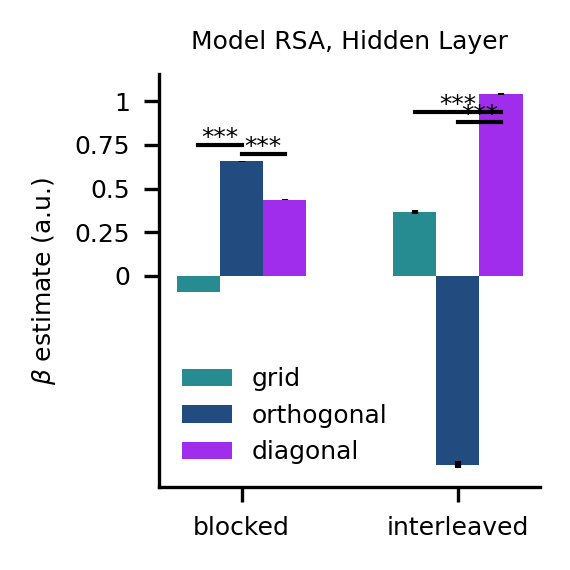

In [23]:
betas = plotting.plot_modelcomparison_hiddenlayerRSA(    
    hebb_models=["blobs_revision_8episodes_sluggish_interleaved_oja_sv","blobs_revision_8episodes_blocked_oja"],
    sluggish_vals=np.round(np.linspace(0.05,1,30),2),sluggishness=0.05,ctx_offset=5)

### Task Selectivity (%)

blocked, task-specific: 27.4
blocked, task-agnostic: 72.6
int, task-specific: 0.5
int, task-agnostic: 99.5


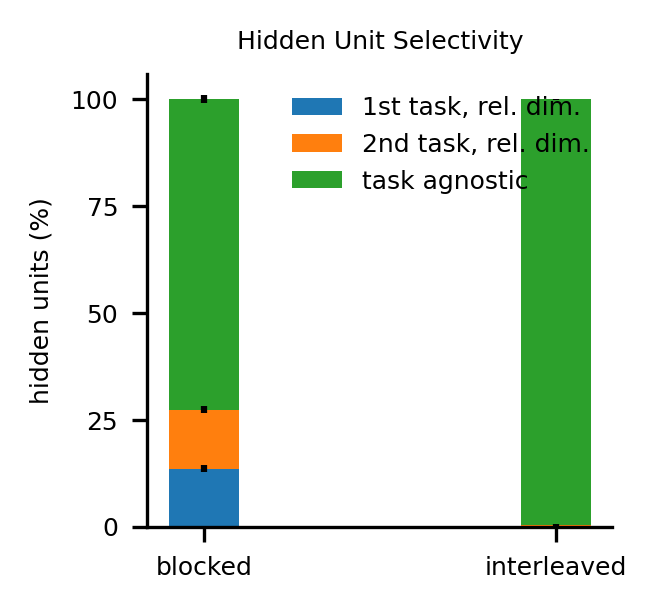

In [14]:
plotting.plot_modelcomparison_taskselectivity(    
    hebb_models=["blobs_revision_8episodes_sluggish_interleaved_oja_sv","blobs_revision_8episodes_blocked_oja"],
    sluggish_vals=np.round(np.linspace(0.05,1,30),2),sluggishness=0.05)

### Readout Magnitude

int 1st vs agnostic: t=-1.26, p=0.2118
int 2nd vs agnostic: t=-1.27, p=0.2063


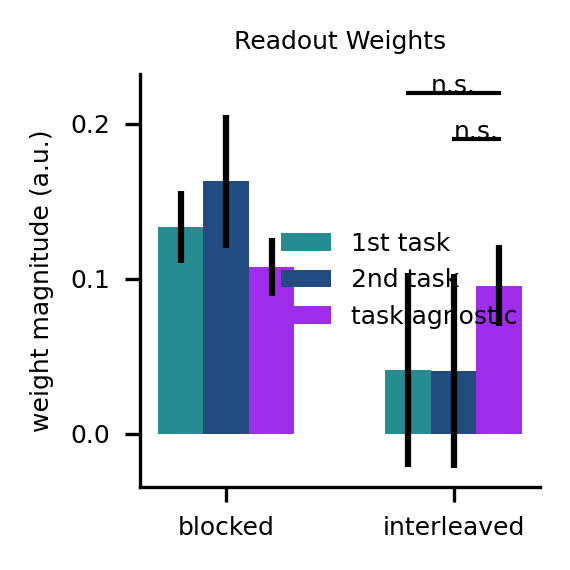

In [25]:
plotting.plot_modelcomparison_readout(    
    hebb_models=["blobs_revision_8episodes_sluggish_interleaved_oja_sv","blobs_revision_8episodes_blocked_oja"],
    sluggish_vals=np.round(np.linspace(0.05,1,30),2),sluggishness=0.05,ctx_scaling=5)

In [151]:
%matplotlib qt
plotting.plot_basicstats(models=["blobs_revision_8episodes_interleaved_oja", "blobs_revision_8episodes_blocked_oja"], n_epochs=8)



In [ ]:
plotting.plot_mds(
    filename_embedding="mds_embeddingblobs_revision_8episodes_interleaved_oja",
    filename_runs= "blobs_revision_8episodes_interleaved_oja", thetas=(105,-50,0), 
    layer="all_y_hidden", n_runs=50, resultsdir="../results/")



In [ ]:

plotting.plot_mds(
    filename_embedding="mds_embedding_blobs_revision_8episodes_blocked_oja", 
    filename_runs = "blobs_revision_8episodes_blocked_oja", 
    thetas=(10,40,-70), layer="all_y_hidden", n_runs=50, resultsdir="../results/",axlims=7)


## Figure S1: Replication with fewer trials

a/ learning curves
b/ choice matrices
c/ context weight corr?
d/ hidden layer mds

In [27]:
%matplotlib qt
plotting.plot_basicstats(models=["blobs_revision_8episodes_interleaved_vanilla", "blobs_revision_8episodes_blocked_vanilla"], n_epochs=8,fixtreesbug=False,n_runs=50)

In [ ]:
plotting.plot_basicstats(models=["blobs_revision_8episodes_blocked_oja"], n_epochs=8,fixtreesbug=False,n_runs=50)

In [153]:
#mds interleaved 8episodes
plotting.plot_mds(
    filename_embedding="mds_embedding_blobs_revision_8episodes_interleaved_vanilla",
    filename_runs= "blobs_revision_8episodes_interleaved_vanilla", thetas=(5,70,5), 
    layer="all_y_hidden", n_runs=50, resultsdir="../results/",fixtreesbug=True,axlims=3.5)

In [154]:
# mds blocked vanilla 8 episodes
plotting.plot_mds(
    filename_embedding="mds_embedding_blobs_revision_8episodes_blocked_vanilla",
    filename_runs= "blobs_revision_8episodes_blocked_vanilla", thetas=(45,0,240), 
    layer="all_y_hidden", n_runs=50, resultsdir="../results/",fixtreesbug=True,axlims=3.5)

In [157]:
# mds blocked oja 8 episodes
plotting.plot_mds(
    filename_embedding="mds_embedding_blobs_revision_8episodes_blocked_oja",
    filename_runs= "blobs_revision_8episodes_blocked_oja", thetas=(-10,170,90), 
    layer="all_y_hidden", n_runs=50, resultsdir="../results/",fixtreesbug=True,axlims=10)

## Figure S2: Impact of training duration


todo: show vanilla and hebb network side by side, with different training length:  
- a/ barplot a/b performance, x-axis training length
- b/ same but with vanilla network

In [ ]:
%matplotlib qt
plotting.plot_neps_impact(whichruns="oja")
plotting.plot_neps_impact(whichruns="vanilla")

## Figure S3: Replication of key findings with RGB inputs
1. task design
- trees space (show mini trees)
- neural network architecture (2 hidden)
2. baseline models and hebb side by side
- learning curves
- task selectivity
- context corr
- outputs
- mds
3. fit to human data

In [42]:
from utils.data import make_trees_dataset

args = parser.parse_args(args=[])
args.centering= False
data = make_trees_dataset(args)
data["x_test_a"].shape

(250, 974)

In [51]:
plt.savefig("C:/users/Timo/Desktop/trees_space.png",transparent=True)

In [50]:
f,axs = plt.subplots(5,5,figsize=(5,5),dpi=300)
axs = axs.ravel()
for i,ax in enumerate(axs):
    ax.imshow(data["x_test_a"][49-i,:972].reshape([int(np.sqrt(972/3))]*2+[3]))
    for k in ax.spines.keys():
        ax.spines[k].set_visible(False)
    ax.set_axis_off()

In [176]:
%matplotlib qt
plotting.plot_basicstats(models=["trees_asha_interleaved_ojactx_1ctx", "trees_asha_blocked_ojactx_1ctx"], n_epochs=50,fixtreesbug=True,n_runs=50)

In [179]:
plotting.plot_mds(
    filename_embedding="mds_embedding_trees_asha_interleaved_ojactx_1ctx_yhidden",
    filename_runs= "trees_asha_interleaved_ojactx_1ctx", thetas=(125,0,45), 
    layer="all_y_hidden", n_runs=50, resultsdir="../results/",fixtreesbug=True,axlims=8,flipdims=True)

In [180]:
plotting.plot_mds(
    filename_embedding="mds_embedding_trees_asha_interleaved_ojactx_1ctx_yhidden2",
    filename_runs= "trees_asha_interleaved_ojactx_1ctx", thetas=(-80,0,90), 
    n_runs=50, resultsdir="../results/",fixtreesbug=True,axlims=8,layer="all_y_hidden2",flipdims=True)

In [184]:
plotting.plot_mds(
    filename_embedding="mds_embedding_trees_asha_blocked_ojactx_1ctx_yhidden",
    filename_runs= "trees_asha_blocked_ojactx_1ctx", thetas=(65,25,-270), 
    layer="all_y_hidden", n_runs=50, resultsdir="../results/",fixtreesbug=True,axlims=8,flipdims=True)

In [185]:
plotting.plot_mds(
    filename_embedding="mds_embedding_trees_asha_blocked_ojactx_1ctx_yhidden2",
    filename_runs= "trees_asha_blocked_ojactx_1ctx", thetas=(0,40,20), 
    layer="all_y_hidden2", n_runs=50, resultsdir="../results/",fixtreesbug=True,axlims=15,flipdims=True)

In [178]:
plotting.plot_basicstats(models=["trees_asha_blocked_vanilla_1ctx"], n_epochs=50,fixtreesbug=True,n_runs=50)

In [186]:
plotting.plot_mds(
    filename_embedding="mds_embedding_trees_asha_blocked_vanilla_1ctx_yhidden",
    filename_runs= "trees_asha_blocked_vanilla_1ctx", thetas=(45,0,0), 
    layer="all_y_hidden", n_runs=50, resultsdir="../results/",fixtreesbug=True, axlims=5,flipdims=True)


In [187]:
plotting.plot_mds(
    filename_embedding="mds_embedding_trees_asha_blocked_vanilla_1ctx_yhidden2",
    filename_runs= "trees_asha_blocked_vanilla_1ctx", thetas=(60,0,0), 
    n_runs=50, resultsdir="../results/",fixtreesbug=True,axlims=8, layer="all_y_hidden2",flipdims=True)

In [ ]:
# fit to human data + sluggishness!

plotting.plot_gridsearch_group(model_int="trees_revision_sluggish_interleaved_oja_sv", model_blocked="trees_revision_sluggish_blocked_oja_sv",sluggish_vals = np.linspace(0.05, 1, 30))

### Accuracy

In [189]:
plotting.plot_modelcomparison_accuracy(
    baseline_models=["trees_asha_interleaved_ojactx_1ctx","trees_asha_blocked_vanilla_1ctx"],
    hebb_models=["trees_revision_sluggish_interleaved_oja_sv","trees_asha_blocked_ojactx_1ctx"],
    sluggish_vals=np.round(np.linspace(0.05,1,30),2),sluggishness=0.51,slope_blocked=12,slope_int=12, fixtreesbug=True,flipdims=True)

acc humans blocked vs interleaved: t=2.32, p=0.0223
acc baseline blocked vs interleaved: t=-73.94, p=0.0000
acc oja blocked vs interleaved: t=3.81, p=0.0005


### Sigmoids

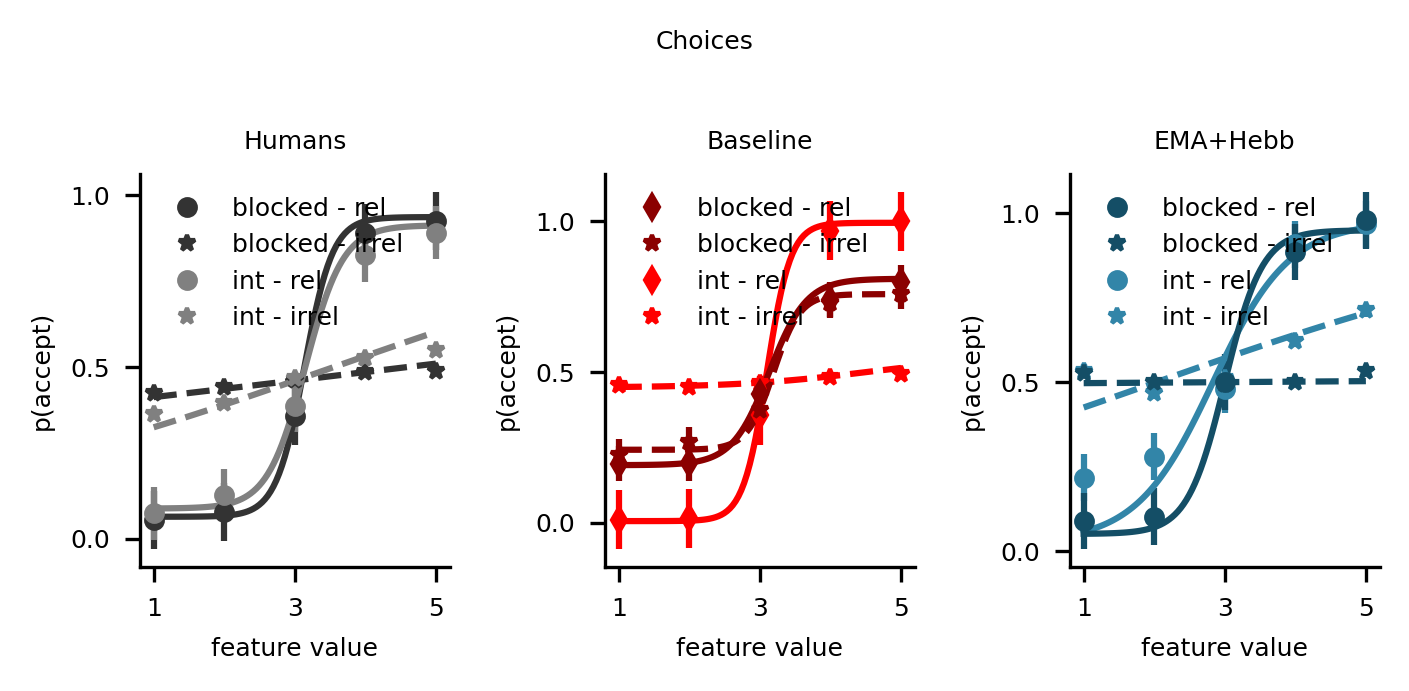

In [2]:
betas = plotting.plot_modelcomparison_sigmoids(
    baseline_models=["trees_asha_interleaved_ojactx_1ctx","trees_asha_blocked_vanilla_1ctx"],
    hebb_models=["trees_revision_sluggish_interleaved_oja_sv","trees_asha_blocked_ojactx_1ctx"],
    sluggish_vals=np.round(np.linspace(0.05,1,30),2),sluggishness=0.51,slope_blocked=12,slope_int=12, fixtreesbug=True,flipdims=True)

2.4088994579189196
betas rel humans blocked vs interleaved: t=2.41, p=0.0180
betas rel baseline blocked vs interleaved: t=-15.26, p=0.0000
betas rel ema blocked vs interleaved: t=1.97, p=0.0526
betas irrel humans blocked vs interleaved: t=-2.77, p=0.0068
betas irrel baseline blocked vs interleaved: t=28.25, p=0.0000
betas irrel ema blocked vs interleaved: t=-5.13, p=0.0000


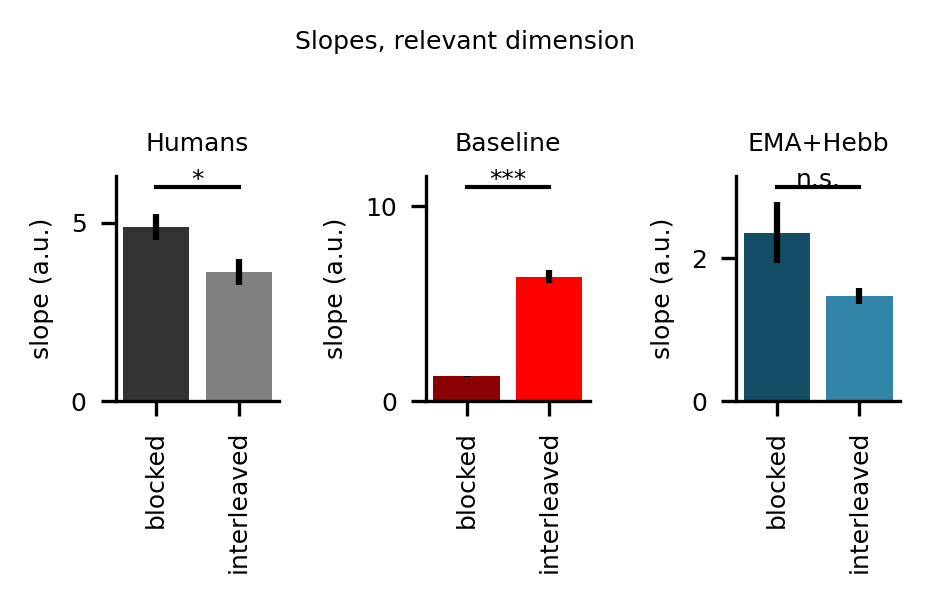

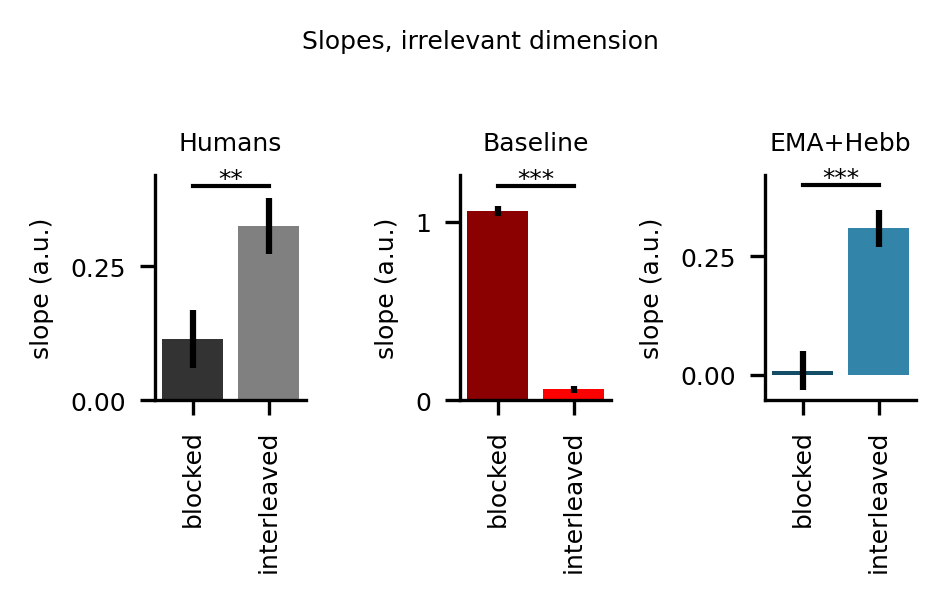

In [3]:
plotting.plot_modelcomparison_betas(betas)

### Choice Matrices

In [191]:
cmats = plotting.plot_modelcomparison_choicemats(
    baseline_models=["trees_asha_interleaved_ojactx_1ctx","trees_asha_blocked_vanilla_1ctx"],
    hebb_models=["trees_revision_sluggish_interleaved_oja_sv","trees_asha_blocked_ojactx_1ctx"],
    sluggish_vals=np.round(np.linspace(0.05,1,30),2),sluggishness=0.51,slope_blocked=12,slope_int=12, fixtreesbug=True,flipdims=True)

humans factorised model blocked vs interleaved: t=3.07, p=0.0028
humans linear model blocked vs interleaved: t=-3.12, p=0.0024
humans interaction blocked vs interleaved: t=3.54, p=0.0006
baseline factorised model blocked vs interleaved: t=-40.86, p=0.0000
baseline linear model blocked vs interleaved: t=13.06, p=0.0000
baseline interaction blocked vs interleaved: t=-30.78, p=0.0000
oja factorised model blocked vs interleaved: t=5.14, p=0.0000
oja linear model blocked vs interleaved: t=-4.39, p=0.0001
oja interaction blocked vs interleaved: t=6.70, p=0.0000


### Psychophysical Model

In [193]:
plotting.plot_modelcomparison_choicemodel(
    baseline_models=["trees_asha_interleaved_ojactx_1ctx","trees_asha_blocked_vanilla_1ctx"],
    hebb_models=["trees_revision_sluggish_interleaved_oja_sv","trees_asha_blocked_ojactx_1ctx"],
    sluggish_vals=np.round(np.linspace(0.05,1,30),2),sluggishness=0.51,slope_blocked=12,slope_int=12, fixtreesbug=True,flipdims=True,resultsfile="thetas_est_trees")

bias blocked vs interleaved: t=-2.54, p=0.0127
lapse blocked vs interleaved: t=-0.41, p=0.6807
slope blocked vs interleaved: t=2.88, p=0.0049
offset blocked vs interleaved: t=0.33, p=0.7419
bias blocked vs interleaved: t=4.67, p=0.0000
lapse blocked vs interleaved: t=3.56, p=0.0010
slope blocked vs interleaved: t=-3.17, p=0.0030
offset blocked vs interleaved: t=3.14, p=0.0033
bias blocked vs interleaved: t=-5.47, p=0.0000
lapse blocked vs interleaved: t=-0.37, p=0.7169
slope blocked vs interleaved: t=2.86, p=0.0068
offset blocked vs interleaved: t=1.53, p=0.1343


### Congruency Effect

In [192]:
plotting.plot_modelcomparison_congruency(cmats)

humans, congruency blocked vs interleaved: t=-2.73, p=0.0075
baselines, congruency blocked vs interleaved: t=49.87, p=0.0000
oja, congruency blocked vs interleaved: t=-7.03, p=0.0000
